In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [ ]:

from numpy.random import seed
seed(8) #1
#from tensorflow import  set_random_seed
 #2

tf.random.set_seed(7)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


In [ ]:
from os import listdir
data_list = listdir('E:/datanew')

#Delete some classes that may interfere


data_list

['test', 'train']

In [ ]:
pip install keras --user

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\python\Python37\python.exe -m pip install --upgrade pip' command.


In [ ]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model ,load_model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [ ]:
DATASET_PATH  = 'E:/datanew/train'
test_dir =  'E:/datanew/test'
IMAGE_SIZE    = (150, 150)
NUM_CLASSES   = len(data_list)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 40
#LEARNING_RATE = 0.0001 #start off with high rate first 0.001 #5e-4


In [ ]:
#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=50,
                                   featurewise_center = True,
                                   featurewise_std_normalization = True,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.25,
                                   zoom_range=0.1,
                                   zca_whitening = True,
                                   channel_shift_range = 20,
                                   horizontal_flip = True ,
                                   vertical_flip = True ,
                                   validation_split = 0.2,
                                   fill_mode='constant')


C:\python\Python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                    #fill_mode='constant')

In [ ]:


train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical",

                                                  )

Found 4502 images belonging to 3 classes.


In [ ]:
#test_batches = test_datagen.flow_from_directory (DATASET_PATH,
                                                 # batch_size=BATCH_SIZE,
                                                  #subset = "training",
                                                  #seed=42,
                                                  #class_mode="categorical",
                                                  #shuffle=False,
#)

In [ ]:


valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical",


                                                  )


Found 1124 images belonging to 3 classes.


In [ ]:
from keras import models
from keras import layers
from keras.applications import VGG16
from keras import optimizers
from keras.layers.core import Flatten, Dense, Dropout, Lambda

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
pretrained_model = ResNet50(weights= 'imagenet', include_top=False, input_shape= (150,150,3))

In [ ]:
#freazing the trained layers
for layers in pretrained_model.layers:
    layers.trainable = False
#pretrained_model3.summary()

In [ ]:
conv_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3))
for layer in conv_model.layers[:-10]:
    layer.trainable = False
x = tf.keras.layers.Flatten()(conv_model.output)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
predictions = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=conv_model.input, outputs=predictions)

model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

451
113


In [ ]:
history=model.fit(train_batches,validation_data = valid_batches,steps_per_epoch =STEP_SIZE_TRAIN,epochs=100,validation_steps = STEP_SIZE_VALID)

C:\python\Python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\python\Python37\lib\site-packages\keras_preprocessing\image\image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
Epoch 1/100
450/450 [==============================] - 317s 706ms/step - loss: 0.5448 - accuracy: 0.7676 - val_loss: 0.6062 - val_accuracy: 0.7411
Epoch 2/100
450/450 [==============================] - 273s 607ms/step - loss: 0.5341 - accuracy: 0.7649 - val_loss: 0.5234 - val_accuracy: 0.7875
Epoch 3/100
450/450 [==============================] - 244s 542ms/step - loss: 0.5270 - accuracy: 0.7736 

In [ ]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
import matplotlib.pyplot as plt

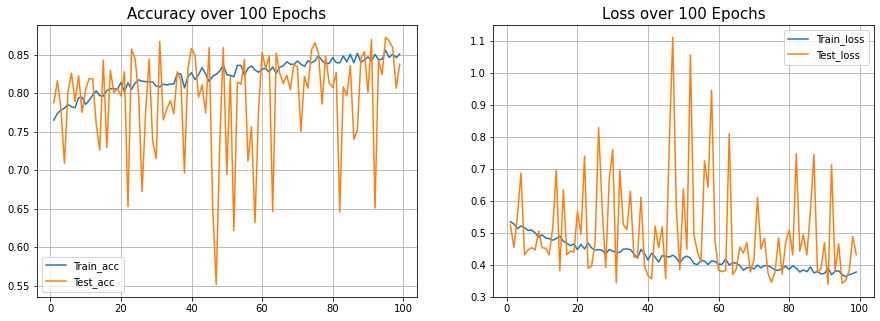

In [ ]:

def plot_acc_loss(result, epochs):
    acc = history.history['accuracy']
    loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_acc_loss(history, 100)

In [ ]:
model.save('resnet3.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        seed=42,


        class_mode="categorical")
eval_generator.reset()

Found 1419 images belonging to 3 classes.


In [ ]:

eval_generator.reset()
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator) / BATCH_SIZE),
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

C:\Users\Prasoon Smirti\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
142/142 [==============================] - 9s 66ms/step - loss: 0.3719 - accuracy: 0.8732
Test loss: 0.3718564808368683
Test accuracy: 0.8732394576072693


In [ ]:
preds = model.evaluate(eval_generator)
print ("Validation Loss = " + str(preds[0]))
print ("Validation Accuracy = " + str(preds[1]))

1419/1419 [==============================] - 84s 59ms/step - loss: 0.3500 - accuracy: 0.8682
Validation Loss = 0.34999415278434753
Validation Accuracy = 0.8682170510292053


In [ ]:
eval_generator.reset()
pred = model.predict(eval_generator,verbose=1)
print("Predictions finished")

1419/1419 [==============================] - 83s 58ms/step
Predictions finished


In [ ]:
print(pred)

[[9.9788326e-01 6.3811793e-05 2.0529677e-03]
 [9.3502474e-01 1.0845198e-02 5.4130033e-02]
 [9.9870169e-01 5.5351189e-05 1.2428948e-03]
 ...
 [4.7279384e-02 1.4411261e-03 9.5127946e-01]
 [6.7910063e-03 9.2861494e-03 9.8392278e-01]
 [1.5228641e-02 3.4407524e-03 9.8133057e-01]]


In [ ]:
pred_labels = np.argmax(pred, axis = 1)

In [ ]:
len(eval_generator.classes)

1419

In [ ]:
len(pred_labels)

1419

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(eval_generator.classes, pred_labels))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       267
           1       0.82      0.75      0.78       313
           2       0.88      0.91      0.89       839

    accuracy                           0.87      1419
   macro avg       0.86      0.85      0.85      1419
weighted avg       0.87      0.87      0.87      1419



In [ ]:
model.save_weights(filepath='final_weightResnet.hdf5')

In [ ]:
#import seaborn as sns

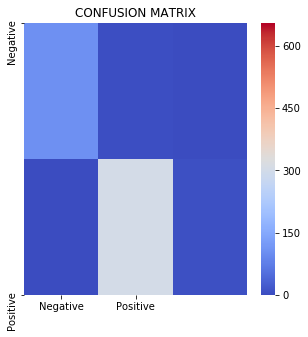

In [ ]:
#con_mat = confusion_matrix(eval_generator.classes,pred_labels)
#plt.figure(figsize = (5,5))
#plt.title('CONFUSION MATRIX')
#sns.heatmap(con_mat, cmap='coolwarm',
            #yticklabels=['Negative', 'Positive'],
            #xticklabels=['Negative', 'Positive'],
            #annot=None);

In [ ]:
from random import randint
random_index = randint(1,len(os.listdir(DATASET_PATH)))
random_image_name = os.listdir(DATASET_PATH)[random_index]

IndexError: list index out of range

In [ ]:
random_image_name

'NORMAL'

In [ ]:
covid_img_path = DATASET_PATH+"/COVID19/"+random_covid_image_name

In [ ]:
random_covid_img = tf.keras.preprocessing.image.load_img(covid_img_path, target_size=(150,150,3))

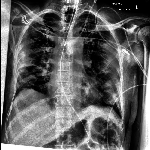

In [ ]:
random_covid_img

In [ ]:
random_covid_img_array = tf.keras.preprocessing.image.img_to_array(random_covid_img)

In [ ]:
random_covid_img_array.shape

(150, 150, 3)

In [ ]:
covid_img_array = np.expand_dims(random_covid_img_array, axis=0)

In [ ]:
covid_img_array.shape

(1, 150, 150, 3)

In [ ]:
np.argmax(model.predict(covid_img_array), axis =1)

array([1])

In [ ]:
eval_generator.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

COVID19/COVID19(460).jpg


ValueError: in user code:

    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/poorvipankajtiwary/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:274 assert_input_compatibility
        ', found shape=' + display_shape(x.shape))

    ValueError: Input 0 is incompatible with layer sequential_1: expected shape=(None, 150, 150, 3), found shape=(None, None, 3)


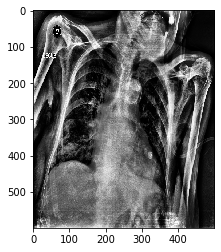

In [ ]:

import cv2


import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = test_dir + "/" +eval_generator.filenames[index]
    image = mpimg.imread(image_path)
    #BGR TO RGB conversion using CV2
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = np.array(image)
    plt.imshow(pixels)
    print(eval_generator.filenames[index])
    print(np.argmax(model.predict(pixels), axis =1))
    plt.show()